# Heart Disease Data Set

# Data Set Information:

This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).
Only 14 attributes used:
#3 (age)
#4 (sex)sex: sex (1 = male; 0 = female)
#9 (cp)
#10 (trestbps)
#12 (chol)
#16 (fbs)
#19 (restecg)
#32 (thalach)
#38 (exang)
#40 (oldpeak)
#41 (slope)
#44 (ca)
#51 (thal)
#58 (num) (the predicted attribute)

In [303]:
#Imporing all the Required Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [304]:
#Uploading Dataset
df=pd.read_csv('heartdisease_data.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [305]:
#Give columns suitable names as per data information.
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
              'thalach','exang','oldpeak','slope','ca','thal','Target']
df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Target
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [306]:
df.isnull().values.any()

False

By looking at the above data we can say there are alot of "?" values present in our data which are actually "NAN" values.Lets replace them by "NAN"

In [307]:
df.replace('?',np.nan,inplace=True)
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Target
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
5,66,1,3,120,0,0,1,120,0,-0.5,1,NaN,NaN,0
6,65,1,4,150,236,1,1,105,1,0,NaN,NaN,NaN,3
7,60,1,3,180,0,0,1,140,1,1.5,2,NaN,NaN,0
8,60,1,3,120,0,NaN,0,141,1,2,1,NaN,NaN,3
9,60,1,2,160,267,1,1,157,0,0.5,2,NaN,NaN,1


In [308]:
df.isnull().values.any()

True

In [309]:
# checking for null values
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
Target        0
dtype: int64

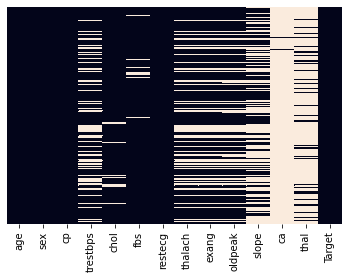

In [310]:
# heatmap for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

We can see count of few column is less for example trestbps,chol etc. but ca and thal columns have a very less count.lets drop them.

In [311]:
#dropping columns with very less count
df=df.drop(['ca','thal',], axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,Target
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,0


In [312]:
#printing the objects data types and there unique values
for column in df.columns:
    if df[column].dtype == object :
        print(str(column) +  ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('**************************************************************')
        print('\n')

trestbps : ['140' '130' '132' '142' '110' '120' '150' '180' '160' '126' nan '128'
 '170' '152' '116' '124' '0' '122' '144' '154' '125' '104' '136' '134'
 '138' '178' '146' '135' '158' '106' '112' '102' '96' '172' '155' '156'
 '118' '100' '190' '114' '127']
120    16
130    15
140    10
110     9
150     9
160     8
122     6
142     5
134     4
126     4
170     4
128     4
136     4
144     4
124     4
158     3
132     3
138     2
180     2
112     2
104     2
155     2
154     2
152     2
116     2
125     2
190     1
118     1
172     1
127     1
156     1
0       1
146     1
96      1
100     1
178     1
114     1
106     1
102     1
135     1
Name: trestbps, dtype: int64
**************************************************************


chol : ['260' '209' '218' '228' '213' '0' '236' '267' '166' '220' '177' '186'
 '100' '171' '230' '281' '203' '277' '233' '240' '153' '224' '316' '311'
 '270' '217' '214' '252' '339' '216' '276' '458' '241' '384' '297' '248'
 '308' '208' '227' '210' 

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  144 non-null    object
 4   chol      193 non-null    object
 5   fbs       193 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   147 non-null    object
 8   exang     147 non-null    object
 9   oldpeak   144 non-null    object
 10  slope     98 non-null     object
 11  Target    200 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 18.9+ KB


In [314]:
#filling up the nan values with median
df=df.fillna(df.median())

In [315]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,Target
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,2,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,2,1
196,62,1,1,130,139,0,1,120,1,1.5,2,0
197,55,1,4,122,223,1,1,100,0,0,2,2
198,58,1,4,130,385,1,2,120,1,1.5,2,0


In [316]:
df.isnull().values.any()

False

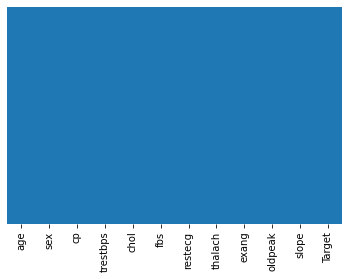

In [317]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20')
plt.show()

In [318]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
Target       int64
dtype: object

In [319]:
#changing the data types to respective data type as per the data in columns
df['oldpeak'] = df['oldpeak'].astype('float64')
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('int64'))
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
Target        int64
dtype: object

# EDA

In [320]:
df.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,Target
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,132.710000,180.050000,0.340000,0.735000,122.055000,0.740000,1.371000,2.065000,1.520000
std,7.811697,0.171015,0.795701,18.335947,112.221727,0.474898,0.683455,18.876269,0.439735,0.941216,0.471046,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.000000,0.000000,1.000000,2.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,1.500000,2.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,2.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,4.000000


In [321]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,Target
age,1.000000,0.034230,-0.038280,0.179566,0.069953,0.135728,0.002400,-0.150146,0.129027,0.156191,0.107135,0.287289
sex,0.034230,1.000000,0.038036,0.008429,-0.093922,-0.059400,0.060621,-0.004156,0.029402,0.100713,0.086709,0.147470
cp,-0.038280,0.038036,1.000000,0.094128,0.068766,-0.044416,0.034790,-0.108585,0.089904,0.015627,0.059460,0.168210
trestbps,0.179566,0.008429,0.094128,1.000000,0.142605,0.185084,0.088871,-0.005253,0.173210,0.103139,0.088883,0.145444
chol,0.069953,-0.093922,0.068766,0.142605,1.000000,0.175249,0.028739,-0.044767,0.116148,0.015728,0.041670,0.079529
fbs,0.135728,-0.059400,-0.044416,0.185084,0.175249,1.000000,0.170616,0.033219,-0.176144,-0.096999,-0.009435,0.048940
restecg,0.002400,0.060621,0.034790,0.088871,0.028739,0.170616,1.000000,0.010094,-0.063203,-0.102623,-0.039881,-0.032800
thalach,-0.150146,-0.004156,-0.108585,-0.005253,-0.044767,0.033219,0.010094,1.000000,-0.093316,0.171803,-0.101567,-0.073072
exang,0.129027,0.029402,0.089904,0.173210,0.116148,-0.176144,-0.063203,-0.093316,1.000000,0.315578,0.106259,0.206541
oldpeak,0.156191,0.100713,0.015627,0.103139,0.015728,-0.096999,-0.102623,0.171803,0.315578,1.000000,0.284230,0.366526


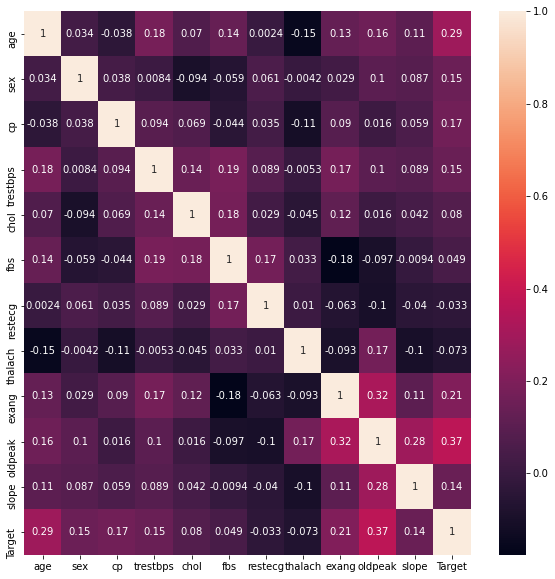

In [322]:
corr_hmap=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

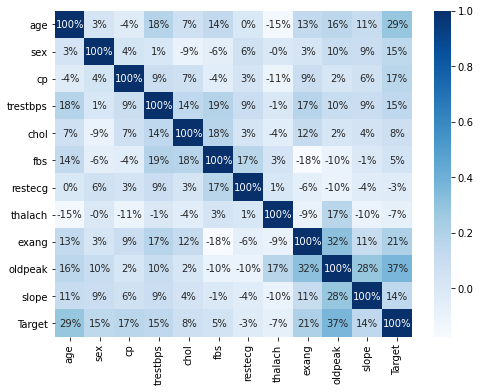

In [323]:
#correlation %
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,fmt='.0%',cmap='Blues')
plt.show()

Text(0.5, 1.0, 'Correlation with target variable')

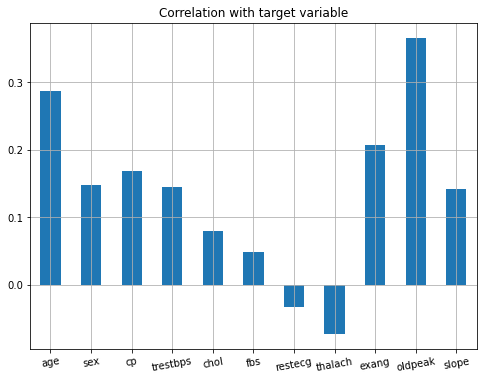

In [324]:
#correlation with the target
plt.figure(figsize=(8,6))
df.drop('Target', axis=1).corrwith(df['Target']).plot(kind='bar',grid=True)
plt.xticks(rotation=10)
plt.title('Correlation with target variable')

# Univariate Analysis 

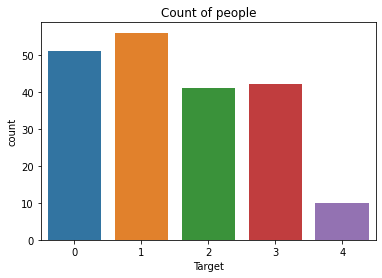

1    56
0    51
3    42
2    41
4    10
Name: Target, dtype: int64


In [325]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Target', data = df)
plt.title('Count of people')
plt.show()
print(df.Target.value_counts())

We can observe that around 51 people have no occurence of heart disease i.e. ~25% and 10 people are at very high risk.

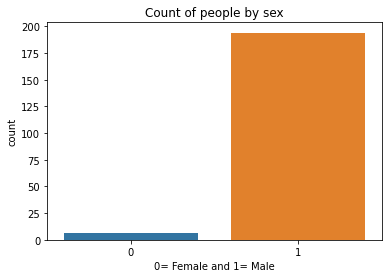

1    194
0      6
Name: sex, dtype: int64


In [326]:
plt.subplots(figsize=(6,4))
sns.countplot(x='sex', data = df)
plt.title('Count of people by sex')
plt.xlabel('0= Female and 1= Male')
plt.show()
print(df.sex.value_counts())

Since 0 represents female and 1 represents male we can male are at very high risk of heart disease.

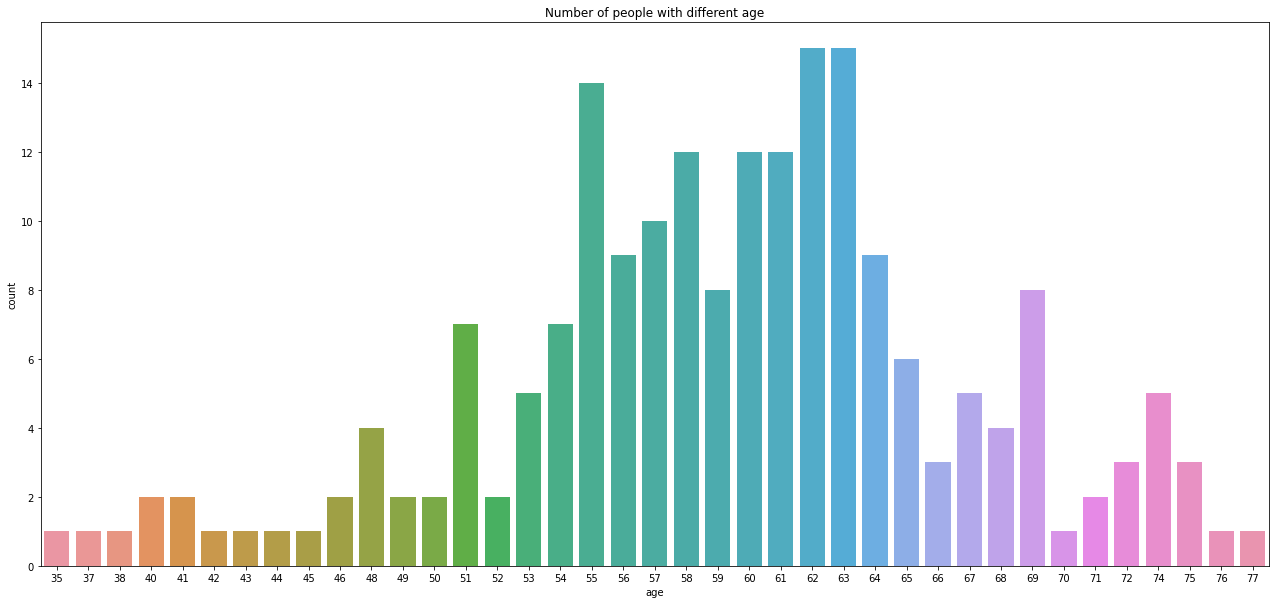

63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: age, dtype: int64


In [327]:
plt.subplots(figsize=(22,10))
sns.countplot(x='age', data = df)
plt.title('Number of people with different age')
plt.show()
print(df.age.value_counts())

# Bivarite Analysis

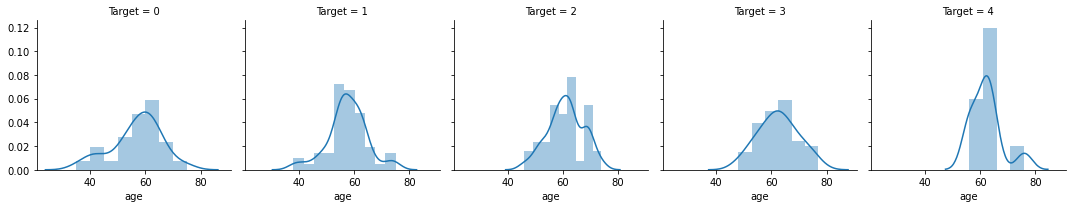

In [328]:
facet= sns.FacetGrid(df,col= 'Target')
facet.map(sns.distplot,'age')
plt.show()

sex  Target
0    0          3
     1          3
1    1         53
     0         48
     3         42
     2         41
     4         10
Name: Target, dtype: int64


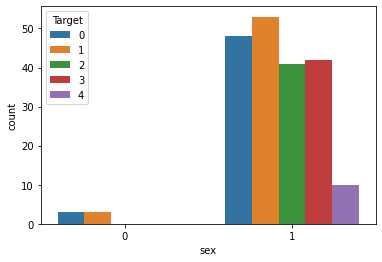

In [329]:
sns.countplot(x='sex',hue='Target',data=df)
print(df.groupby('sex')['Target'].value_counts())

fbs  Target
0    0         37
     1         34
     2         28
     3         27
     4          6
1    1         22
     3         15
     0         14
     2         13
     4          4
Name: Target, dtype: int64


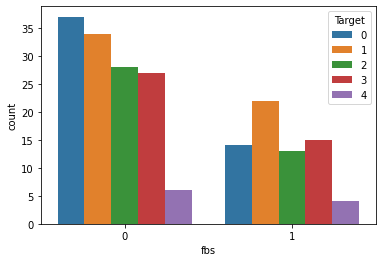

In [330]:
sns.countplot(x='fbs',hue='Target',data=df)
print(df.groupby('fbs')['Target'].value_counts())

exang  Target
0      0         20
       1         15
       2         10
       3          6
       4          1
1      1         41
       3         36
       0         31
       2         31
       4          9
Name: Target, dtype: int64


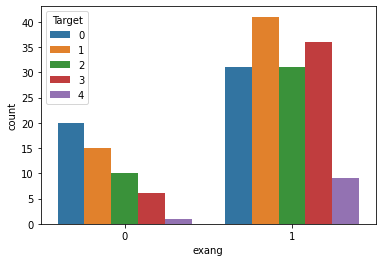

In [331]:
sns.countplot(x='exang',hue='Target',data=df)
print(df.groupby('exang')['Target'].value_counts())

slope  Target
1      1          5
       3          5
       0          3
       2          3
2      0         45
       1         45
       3         31
       2         29
       4          5
3      2          9
       1          6
       3          6
       4          5
       0          3
Name: Target, dtype: int64


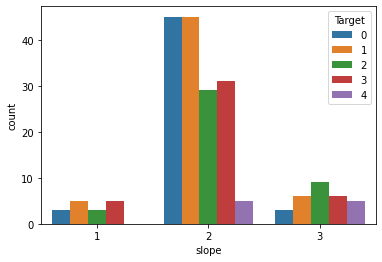

In [332]:
sns.countplot(x='slope',hue='Target',data=df)
print(df.groupby('slope')['Target'].value_counts())

# Outlier Detection 

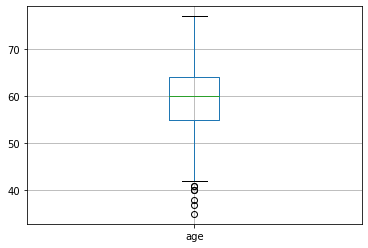

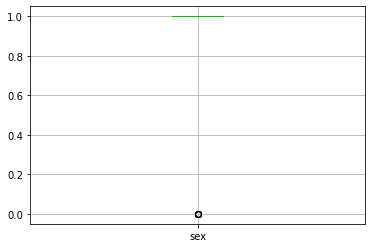

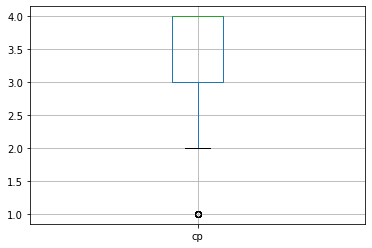

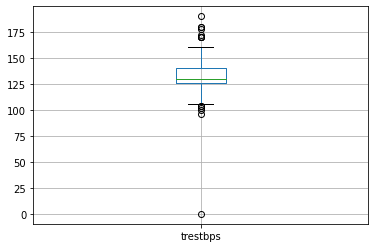

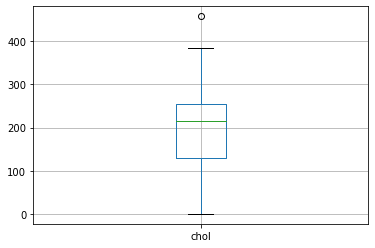

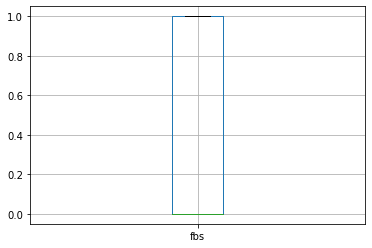

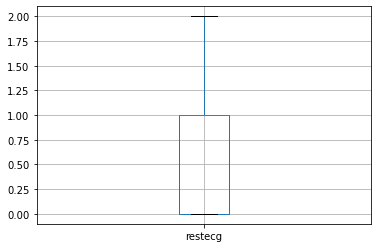

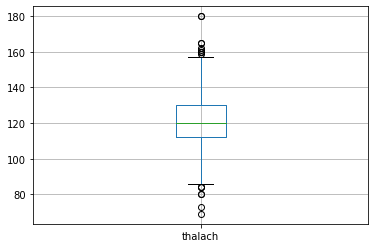

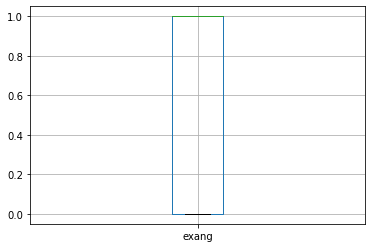

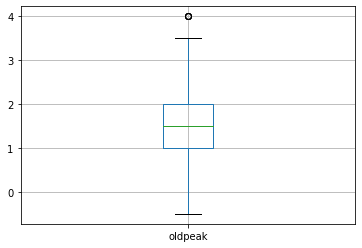

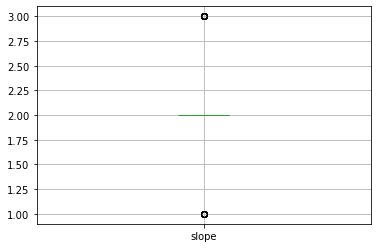

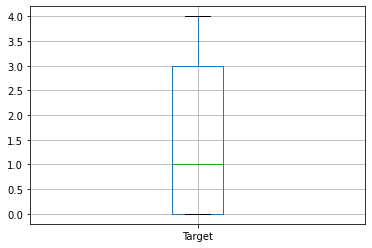

In [333]:
for column in df:
    plt.figure()
    df.boxplot([column])

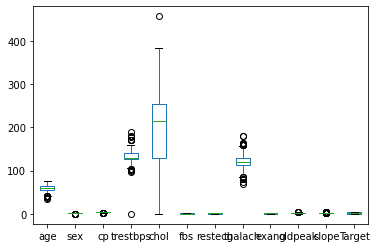

In [334]:
df.plot(kind='box')

From above two graphs we can observe that there are some outliers present in the data.

In [335]:
#removing outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
print(df.shape)
df=df.loc[(z<3).all(axis=1)]
print(df.shape)

(200, 12)
(181, 12)


In [336]:
# Checking for Skewness
df.skew()

age        -0.341400
sex         0.000000
cp         -1.414098
trestbps    0.698089
chol       -0.580544
fbs         0.748785
restecg     0.386145
thalach     0.058124
exang      -1.207866
oldpeak     0.291281
slope       0.273012
Target      0.274859
dtype: float64

In [337]:
#removing skewness
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.log1p(df[col])
        if df[col].skew()<-0.55:
            df[col]=np.log1p(df[col])

In [338]:
df.skew()

age        -0.341400
sex         0.000000
cp         -1.656362
trestbps    0.302934
chol       -1.152266
fbs         0.748785
restecg     0.386145
thalach     0.058124
exang      -1.207866
oldpeak     0.291281
slope       0.273012
Target      0.274859
dtype: float64

Assigning Train and Test data to X and Y variables

In [339]:
x=df.iloc[:,:-1].values
x

array([[63.        ,  1.        ,  1.60943791, ...,  0.69314718,
         3.        ,  2.        ],
       [44.        ,  1.        ,  1.60943791, ...,  0.        ,
         0.        ,  2.        ],
       [60.        ,  1.        ,  1.60943791, ...,  0.69314718,
         1.5       ,  3.        ],
       ...,
       [55.        ,  1.        ,  1.60943791, ...,  0.        ,
         0.        ,  2.        ],
       [58.        ,  1.        ,  1.60943791, ...,  0.69314718,
         1.5       ,  2.        ],
       [62.        ,  1.        ,  1.09861229, ...,  0.69314718,
         0.        ,  2.        ]])

In [340]:
y=df.iloc[:,-1].values
y

array([2, 0, 2, 1, 0, 0, 3, 0, 3, 1, 0, 1, 1, 1, 1, 0, 4, 1, 0, 0, 2, 1,
       3, 0, 2, 2, 1, 1, 3, 3, 3, 3, 2, 3, 2, 0, 1, 0, 3, 1, 3, 0, 4, 2,
       1, 0, 2, 0, 1, 2, 0, 1, 2, 2, 3, 0, 1, 0, 2, 1, 4, 2, 2, 1, 1, 1,
       2, 3, 3, 1, 3, 2, 0, 2, 2, 2, 4, 2, 3, 0, 1, 1, 3, 0, 3, 1, 0, 3,
       1, 0, 1, 3, 1, 1, 0, 3, 1, 1, 0, 0, 3, 0, 3, 1, 1, 3, 2, 2, 3, 1,
       2, 3, 1, 0, 1, 4, 2, 0, 1, 1, 3, 0, 3, 0, 2, 0, 4, 2, 4, 0, 0, 0,
       1, 3, 3, 0, 3, 1, 1, 2, 2, 2, 2, 2, 1, 4, 3, 3, 3, 1, 3, 2, 0, 2,
       1, 1, 0, 3, 1, 0, 0, 2, 3, 1, 1, 0, 1, 1, 0, 1, 3, 2, 2, 0, 4, 3,
       1, 2, 2, 0, 1])

In [341]:
print(x.shape,y.shape)

(181, 11) (181,)


Using Standard Scaler:
To bring all the values at the same scale

In [342]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

# Train and Test Split

In [343]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40,stratify=y)

In [344]:
print(x_train.shape,x_test.shape)

(126, 11) (55, 11)


In [345]:
print(y_train.shape,y_test.shape)

(126,) (55,)


# Model Selection

In [346]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#importing error metrics
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [347]:
parameters={'n_neighbors':range(22,25)}
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 24}


In [348]:
KNN=KNeighborsClassifier(n_neighbors=24)

In [349]:
model=[GaussianNB(),SVC(),KNN,DecisionTreeClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*************************************************************************')
    print('\n')

Accuracy Score of GaussianNB() is:
0.21818181818181817
[[3 2 2 5 1]
 [6 4 0 6 0]
 [2 2 1 6 1]
 [1 1 4 4 1]
 [0 1 1 1 0]]
              precision    recall  f1-score   support

           0       0.25      0.23      0.24        13
           1       0.40      0.25      0.31        16
           2       0.12      0.08      0.10        12
           3       0.18      0.36      0.24        11
           4       0.00      0.00      0.00         3

    accuracy                           0.22        55
   macro avg       0.19      0.19      0.18        55
weighted avg       0.24      0.22      0.22        55

*************************************************************************


Accuracy Score of SVC() is:
0.3090909090909091
[[ 2  9  1  1  0]
 [ 4 10  1  1  0]
 [ 2  3  4  3  0]
 [ 2  4  4  1  0]
 [ 0  2  0  1  0]]
              precision    recall  f1-score   support

           0       0.20      0.15      0.17        13
           1       0.36      0.62      0.45        16
           2 

In [351]:
models=[GaussianNB(),SVC(),KNN,DecisionTreeClassifier()]
for m in models:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print("Model:",m)
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard Deviation ',score.std())
    print('*************************************************************************')
    print('\n')

Model: GaussianNB()
Score: [0.21052632 0.27777778 0.33333333 0.22222222 0.38888889 0.16666667
 0.33333333 0.5        0.27777778 0.16666667]
Mean Score: 0.287719298245614
Standard Deviation  0.09960594018085431
*************************************************************************


Model: SVC()
Score: [0.31578947 0.44444444 0.38888889 0.27777778 0.44444444 0.33333333
 0.38888889 0.44444444 0.5        0.27777778]
Mean Score: 0.3815789473684211
Standard Deviation  0.07361513981669944
*************************************************************************


Model: KNeighborsClassifier(n_neighbors=24)
Score: [0.31578947 0.38888889 0.27777778 0.33333333 0.44444444 0.27777778
 0.44444444 0.38888889 0.27777778 0.27777778]
Mean Score: 0.34269005847953216
Standard Deviation  0.06530098046735813
*************************************************************************


Model: DecisionTreeClassifier()
Score: [0.26315789 0.11111111 0.61111111 0.22222222 0.38888889 0.33333333
 0.5        0.33

In [352]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [353]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy Score of RandomForestClassifier() is:
0.2
[[4 4 4 1 0]
 [7 4 4 1 0]
 [4 3 1 4 0]
 [3 3 3 2 0]
 [0 1 1 1 0]]
              precision    recall  f1-score   support

           0       0.22      0.31      0.26        13
           1       0.27      0.25      0.26        16
           2       0.08      0.08      0.08        12
           3       0.22      0.18      0.20        11
           4       0.00      0.00      0.00         3

    accuracy                           0.20        55
   macro avg       0.16      0.16      0.16        55
weighted avg       0.19      0.20      0.19        55



Accuracy Score of AdaBoostClassifier() is:
0.3090909090909091
[[6 0 6 1 0]
 [5 4 5 2 0]
 [0 2 7 3 0]
 [4 2 5 0 0]
 [0 1 0 2 0]]
              precision    recall  f1-score   support

           0       0.40      0.46      0.43        13
           1       0.44      0.25      0.32        16
           2       0.30      0.58      0.40        12
           3       0.00      0.00      0.00    

In [354]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predm))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))

0.2
[[4 2 4 3 0]
 [9 2 3 2 0]
 [2 3 4 3 0]
 [2 3 5 1 0]
 [0 1 1 1 0]]
              precision    recall  f1-score   support

           0       0.24      0.31      0.27        13
           1       0.18      0.12      0.15        16
           2       0.24      0.33      0.28        12
           3       0.10      0.09      0.10        11
           4       0.00      0.00      0.00         3

    accuracy                           0.20        55
   macro avg       0.15      0.17      0.16        55
weighted avg       0.18      0.20      0.19        55



In [355]:
import joblib
joblib.dump(gbc,'heartdisease.pkl')

['heartdisease.pkl']